<h2>Project 3. Data Analysis using real data.</h2>

<h3>Drew Caldwell, Indiana University-Kokomo, 2/25/2024, CSCI-C490</h3>

<h2>Step 1. Load and explore the data set.</h2>

<p>I chose to dive into some survey results regarding Music and Mental Health. The data set was downloaded from kaggle at,
https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results/data . The data set asks users to input how they feel about their mental health where 0 is no feeling at all and 10 is experiencing it regularly. The survey covers Anxiety, Depression, Insomnia, and OCD to name a few.</p>

In [2]:
#import pandas to explore data
import pandas as pd

# We will also need seaborn and matplotlib to look at a visual 
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from your GitHub link with a different encoding
url = "https://raw.githubusercontent.com/drewdcaldwell/CSCI490_Project3/main/mxmh_survey_results.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')

# Display the initial parts of the data table
df.head()


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


<h3>Step 2. Formulating a hypothesis</h3>

<p>I think it is common, especially in older generations that Depression, Anxiety, and other mental health feelings are more common in the younger generations. I wish to show, that this is true or not, based on this survey regarding music.</p>

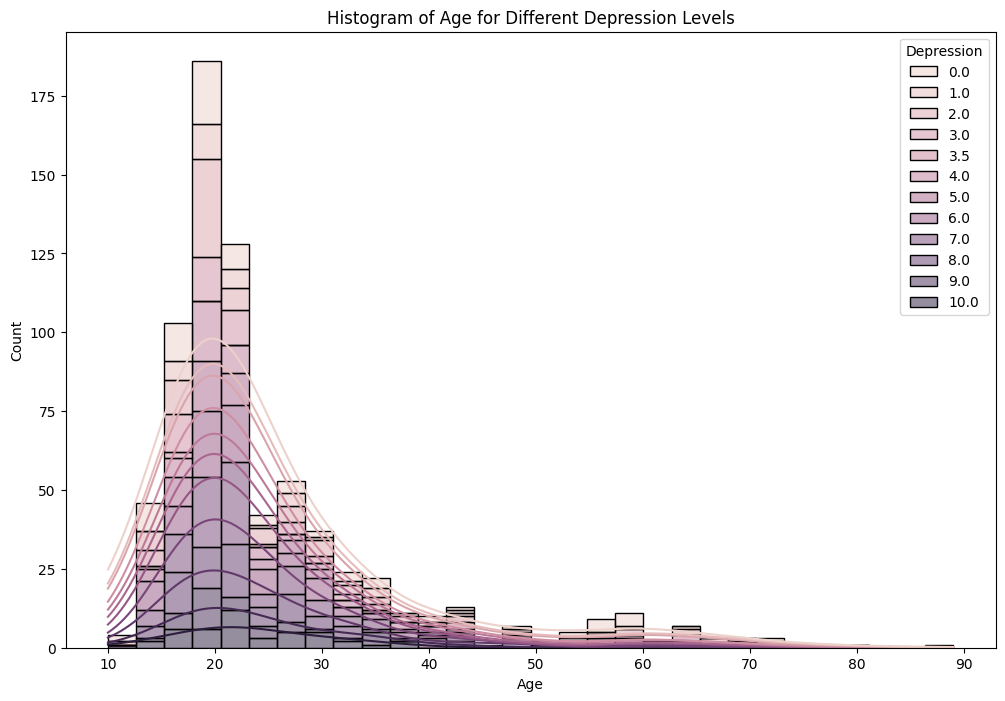

In [4]:
# Create a histogram for Age with different colors for each depression level
plt.figure(figsize=(12, 8))

# plot the data
sns.histplot(data=df, x='Age', hue='Depression', multiple='stack', bins=30, kde=True)

# graph title
plt.title('Histogram of Age for Different Depression Levels')

# label the axis
plt.xlabel('Age')
plt.ylabel('Count')

#display the graph to user
plt.show()

<p>I really like this visualize because it shows that the overall average response has to be around 20-30. However, it doesn't imply that a high depression response occurs in younger listeners. </p>

<p>Now we can look into whether or not the depression rating correlates to age, or if there may be another variable causing such.</p>

In [43]:
# Describe the data table.
# This will give us an idea of some of the variables that we could us to help us come to a conclusion.
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


<p>Here we see that the mean age of all survey participants was 25.2. So, lets seperate our data into some subsets.</p>

<h3>Subset 1: Depression response of 6 or more.</h3>

In [44]:
# selecting a subset of data consists of people with diabetes, i.e., outcome = 1
df_depression = df[df["Depression"] > 5]

# show the statics on each column
df_depression.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,344.000000,344.000000,3.010000e+02,344.000000,344.000000,344.000000,344.000000
mean,23.799419,3.957703,3.322383e+06,7.098837,7.581395,4.764535,3.133721
std,8.755034,3.010471,5.763903e+07,2.269483,1.328891,2.992667,2.950440
min,12.000000,0.000000,0.000000e+00,0.000000,6.000000,0.000000,0.000000
25%,18.000000,2.000000,1.010000e+02,6.000000,6.000000,2.000000,0.000000
50%,22.000000,3.000000,1.200000e+02,8.000000,7.000000,5.000000,2.000000
75%,27.000000,5.000000,1.450000e+02,9.000000,8.000000,7.000000,5.000000
max,68.000000,20.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


<h3>Subset 2: Respondents with an age younger than 20.</h3>

In [45]:
# selecting a subset of data consists of people with diabetes, i.e., outcome = 1
df_youth = df[df["Age"] <= 20]

# show the statics on each column
df_youth.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,339.000000,339.000000,3.050000e+02,339.000000,339.000000,339.000000,339.000000
mean,17.401180,3.836873,3.278813e+06,5.874631,4.513274,3.632743,2.684366
std,1.858484,3.072530,5.725983e+07,2.681805,2.974343,3.031651,2.806231
min,10.000000,0.000000,2.000000e+01,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.010000e+02,4.000000,2.000000,1.000000,0.000000
50%,18.000000,3.000000,1.200000e+02,7.000000,5.000000,3.000000,2.000000
75%,19.000000,5.000000,1.410000e+02,8.000000,7.000000,6.000000,5.000000
max,20.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


<p>In this dataset we see that for all participants under the age of 20. The average depression feeling was 4.51. Now, for an older data field.</p>

<h3>Subset 3: Respondents with age greater than 49.</h3>

In [46]:
# selecting a subset of data consists of people with an age greater than 49
df_adults = df[df["Age"] >= 50]

# show the statics on each column
df_adults.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,48.000000,48.000000,36.000000,48.000000,48.000000,48.000000,48.000000
mean,61.687500,3.682292,115.805556,3.520833,2.541667,3.312500,1.312500
std,7.682963,4.107511,44.329171,2.744353,2.414128,3.327233,2.043737
min,50.000000,0.250000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,1.500000,91.000000,1.000000,0.000000,0.750000,0.000000
50%,60.000000,2.000000,119.500000,3.000000,2.000000,2.000000,1.000000
75%,65.500000,4.250000,135.500000,6.000000,4.000000,6.000000,2.000000
max,89.000000,24.000000,220.000000,10.000000,10.000000,10.000000,10.000000


And here, we see that the average depression rating for respondants 50 years old and older is only 2.54. This is significantly less than 4.51 in terms of our scale.

<h3>Step 3. Hypothesis test</h3>

<p>So from what we know so far

NULL (H_0): the average age of people with depression (depression > 5) is less than 25.

ALTERNATIVE (H_1): the average of people with depression is greater than or equal to 25.

we will use a one sample, one tailed t-test for this hypothesis test with a significance level of 0.05.</p>

In [47]:
#import stats tests
from scipy import stats

# select age data for people with depression
age_data_depression = df[df["Depression"] > 5]['Age']

#run the t-test
t_statistic, p_value = stats.ttest_1samp(age_data_depression, 25, alternative='greater')

#display the p-value
print(p_value)

0.9942916361763231


<p>Since our p value is greater than 0.05 we accept the null. Thus, the average age of people with a depression score of higher than 5 is less than 25. Thus, implying to us that depression is more common at a younger age.</p>

<p>Hypothesis testing #2:

We will now test whether the average age of people that answered 5 or higher to depression is higher than the average of people who answered less than 5.

Now, for our hypothesis,

NULL (H_0) Hypothesis: The average age of people who have depression is equal to the average age of people who do not have depression.

ALTERNATIVE (H_1) Hypothesis: The average age of people with depression is less than the average age of people with depression.

Now, we will use a two-sample, one tailed t-test for this hypothesis testing, with a significance level of 0.5.</p>

In [51]:
# create a data table for people whos Depression response was greater than 5
age_data_depression = df[df["Depression"] > 5]['Age']

# select age data for people without diabetes
age_data_no_depression = df[df["Depression"] <= 5]['Age']

# run the t-test
t_statistic, p_value = stats.ttest_ind(age_data_no_depression, age_data_depression, alternative='lower') 

#display the p-value
print(p_value)

nan


Now, since the p-value is less than 0.05, we choose to reject the null hypothesis and accept the alternative hypothesis. Thus there is significant evidence to support the claim that the average age of people with depression is less than the average age of people without depression.

<h3>Step 4: Conclusion</h3>

<p>Through the two hypothesis tests conducted we can conclude that depression is related to age. More so,

1. The average age of people with depression is less than 25.
2. The average age of people with depression is less than the average age of people without depression.

Thus from the conclusions drawn from the hypothesis tests we can infer that.

<b>Age and Depression:</b>
The evidence suggests that higher depression responses are more prevalent in younger generations. However, it's crucial to note that this doesn't imply exclusivity to younger individuals. Depression can be a dynamic experience, and factors such as retirement, personal growth, or life changes may contribute to lower responses in older generations.

The complexity of depression defies a simple age-related categorization. While the average age for depression leans towards the younger demographic, it's important to recognize that individuals of any age can be affected. The identified patterns may be particularly relevant for individuals in the 18-28 age range, shedding light on the approximate age when depression tends to be more common.

Understanding the age dynamics of depression can enhance empathy and support, especially when interacting with individuals within the 18-28 age group. Acknowledging the average age of depression as around 23 provides valuable context for fostering understanding and compassionate care.
</p>